<a href="https://colab.research.google.com/github/Miyamura1101/Viagens_Brasil_2024/blob/main/Viagens_Brasil_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ano = 2024
caminho_dados = f"/content/drive/MyDrive/AD/{ano}_Viagem.csv"
caminho_saida_Tabela = f"/content/drive/MyDrive/AD/output/Tabela_{ano}.csv"
caminho_saida_Grafico = f"/content/drive/MyDrive/AD/output/Grafico_{ano}.png"

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
# Lendo os dados
df_viagens_2024 = pd.read_csv(caminho_dados, sep=';', encoding='Windows-1252', decimal=",")

# Criando nova coluna de despesas
df_viagens_2024['Despesas'] = df_viagens_2024['Valor diárias'] + df_viagens_2024['Valor devolução'] + df_viagens_2024['Valor outros gastos'] + df_viagens_2024['Valor passagens']

# Ajustando valores nulos na coluna de cargo
df_viagens_2024['Cargo'] = df_viagens_2024['Cargo'].fillna('NÃO INFORMADO')

# Convertendo a coluna de datas
df_viagens_2024['Período - Data de início'] = pd.to_datetime(df_viagens_2024['Período - Data de início'], format= "%d/%m/%Y")
df_viagens_2024['Período - Data de fim'] = pd.to_datetime(df_viagens_2024['Período - Data de fim'], format= "%d/%m/%Y")

# Criando novas colunas de data
df_viagens_2024['Mês da Viagem'] = df_viagens_2024['Período - Data de início'].dt.month_name()
df_viagens_2024['Dias de Viagem'] = (df_viagens_2024['Período - Data de fim'] - df_viagens_2024['Período - Data de início']).dt.days

In [ ]:
df_viagens_consolidados = (
    df_viagens_2024
      .groupby('Cargo')
      .agg(
          despesa_media = ('Despesas', 'mean'),
          despesas_totais = ('Despesas', 'sum'),
          dias_media = ('Dias de Viagem', 'mean'),
          destino_mais_frequente = ('Destinos', pd.Series.mode),
          n_viagens = ('Destinos', 'count')
      )
      .sort_values('despesas_totais', ascending=False)
      .reset_index()
)

In [ ]:
df_cargo = df_viagens_2024['Cargo'].value_counts(normalize=True).reset_index()
# Cargos com gastos de mais de 1 porcento
cargos_consolidados = df_cargo.loc[df_cargo['proportion'] >= 0.01, 'Cargo']

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_final = df_viagens_consolidados[df_viagens_consolidados['Cargo'].isin(cargos_consolidados)].sort_values('despesa_media', ascending=False)

df_final.to_csv(caminho_saida_Tabela, index=False)

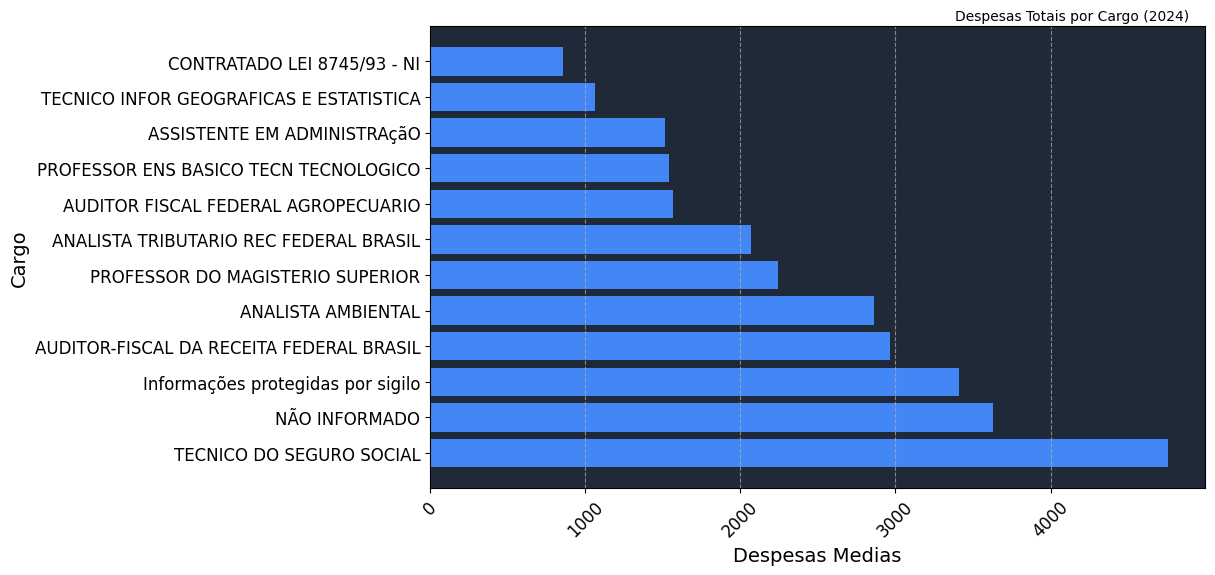

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df_final['Cargo'], df_final['despesa_media'], color="#4287f5")
ax.set_ylabel('Despesas Media')
ax.set_xlabel('Cargo')

ax.set_facecolor('#202938')

plt.figtext(0.65, 0.89,'Despesas Totais por Cargo (2024)')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.yticks(fontsize=12)

plt.ylabel('Cargo', fontsize=14)
plt.xlabel('Despesas Medias', fontsize=14)

plt.xticks(rotation=45, fontsize=12)

plt.savefig(caminho_saida_Grafico, bbox_inches='tight')